In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,classification_report,\
precision_score,roc_auc_score,matthews_corrcoef,precision_recall_fscore_support,make_scorer,\
accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,precision_recall_curve

from sklearn.model_selection import cross_validate,cross_val_score,RepeatedStratifiedKFold,KFold
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import ADASYN
 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,StackingClassifier,VotingClassifier

from matplotlib import pyplot

In [2]:
df=pd.read_excel("C:/Users/saich/OneDrive/Desktop/Diabetes_Classification.xlsx")

In [3]:
df.drop(labels="Patient number",axis=1,inplace=True)

In [4]:
df.replace({'Gender':{"female":"F","male":"M"}},inplace=True)

In [5]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cholesterol        50.000
Glucose            26.750
HDL Chol           21.000
Chol/HDL ratio      2.200
Age                26.000
Gender              1.000
Height              6.000
Weight             49.750
BMI                 8.175
Systolic BP        26.000
Diastolic BP       15.000
waist               8.000
hip                 7.000
Waist/hip ratio     0.100
dtype: float64


In [7]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
len(df)

290

In [9]:
target=df["Diabetes"]
features=df.drop(columns="Diabetes",axis=1)

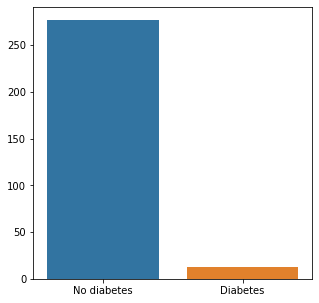

In [10]:
plt.figure(figsize=(5,5))
sns.barplot(x=list(target.value_counts().index),y=list(target.value_counts().values))
plt.show()

In [11]:
len(target)+len(features)

580

In [12]:
ada = ADASYN(random_state=42,sampling_strategy="minority")
new_features, new_target = ada.fit_resample(features, target)

In [13]:
scaler = StandardScaler()
X_res=pd.DataFrame(scaler.fit_transform(new_features),columns=list(new_features.columns))
y_res=new_target

In [14]:
len(X_res)

554

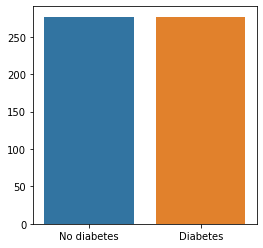

In [15]:
plt.figure(figsize=(4,4))
sns.barplot(x=list(y_res.value_counts().index),y=list(y_res.value_counts().values))
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X_res,
                                               y_res,
                                               test_size=0.35,
                                               random_state=42)

In [17]:
len(Y_test1[Y_test1=="Diabetes"])

96

# Function to get scores(KFold cross validation)

In [18]:
def evaluate_model_accuracy(model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
    return scores


def evaluate_model_recall_positive(model,X,y):
    scoring = {'recall' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_recall"]

def evaluate_model_roc_auc(model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=kfold, n_jobs=-1)
    return scores


def evaluate_model_precision(model,X,y):
    scoring = {'precision' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_precision"]

def evaluate_model_f1score(model,X,y):
    scoring = {'f1' : make_scorer(recall_score,pos_label="Diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_f1"]

def evaluate_model_recall_negative(model,X,y):
    scoring = {'recall' : make_scorer(recall_score,pos_label="No diabetes") }
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    results =cross_validate(estimator=model,
                                    X=X,
                                    y=y,
                                    cv=kfold,
                                    scoring=scoring)
    return results["test_recall"]

def evaluate_model_matthews_corrcoef(model,X,y):
    score=matthews_corrcoef(y,model.predict(X))
    return scores

# Logistic Regression

In [19]:
LR=LogisticRegression(C=0.03359818286283781,penalty="l2",solver= 'liblinear',random_state=42)

LR.fit(X_train1,Y_train1)

LogisticRegression(C=0.03359818286283781, random_state=42, solver='liblinear')

In [20]:
print(classification_report(Y_test1,LR.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.88      0.92      0.90        96
 No diabetes       0.91      0.88      0.90        98

    accuracy                           0.90       194
   macro avg       0.90      0.90      0.90       194
weighted avg       0.90      0.90      0.90       194



In [21]:
cv = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
scoring = {'recall' : make_scorer(recall_score,pos_label="Diabetes") }

In [22]:
# for recall
results1 =cross_validate(estimator=LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)
# for accuracy
accuracy1 = model_selection.cross_val_score(LR, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [23]:
print("Accuracy",np.mean(accuracy1))
print("recall score is :",np.mean(results1["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(LR, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results1["score_time"]))
print("fit time is :",np.mean(results1["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,LR.predict(X_test1)))

Accuracy 0.8868421052631579
recall score is : 0.9058658008658009
roc-auc score is 0.9233404928404928
score time is : 0.002596426010131836
fit time is : 0.002790522575378418
recall score for No diabetes is : 0.8478021978021978
matthews_corrcoef is:  0.7945555801711949


# Grid Search

In [204]:
# param_grid = [
#     {
#      'penalty' : ['l1', 'l2'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['liblinear']}
# ]

# # param_grid = [
# #     {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30]}
# # ]

# # param_grid = dict(n_neighbors=list(range(10, 31)))

# param_grid = [
#      {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30]}
#  ]
    

# # # # grid = RandomizedSearchCV(knn, param_distributions = param_grid, cv = 10,n_jobs=-1)
# grid=GridSearchCV(LR,param_grid,cv=5,n_jobs=-1)

# grid.fit(X_train1,Y_train1)



In [205]:
# grid.best_params_

# Decsison Trees

In [206]:
classifier1=DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=42)

In [207]:
classifier1.fit(X_train1,Y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)

In [208]:
print(classification_report(Y_test1,classifier1.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.90      0.97      0.93        96
 No diabetes       0.97      0.90      0.93        98

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.94      0.93      0.93       194



In [209]:
results2 =cross_validate(estimator=classifier1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy2 = model_selection.cross_val_score(classifier1, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [210]:
print("Accuracy",np.mean(accuracy2))
print("recall score is :",np.mean(results1["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(classifier1, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results1["score_time"]))
print("fit time is :",np.mean(results1["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=classifier1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,classifier1.predict(X_test1)))

Accuracy 0.8768421052631579
recall score is : 0.9058658008658009
roc-auc score is 0.8708431845931847
score time is : 0.0027278661727905273
fit time is : 0.004705739021301269
recall score for No diabetes is : 0.8565262515262514
matthews_corrcoef is:  0.868325878202263


# KNN

In [211]:
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train1, Y_train1) 

KNeighborsClassifier(n_neighbors=11)

In [212]:
print(classification_report(Y_test1,knn.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.81      1.00      0.89        96
 No diabetes       1.00      0.77      0.87        98

    accuracy                           0.88       194
   macro avg       0.90      0.88      0.88       194
weighted avg       0.90      0.88      0.88       194



In [213]:
results3 =cross_validate(estimator=knn,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy3 = model_selection.cross_val_score(knn, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [214]:
print("Accuracy",np.mean(accuracy3))
print("recall score for Diabetes is :",np.mean(results3["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(knn, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results3["score_time"]))
print("fit time is :",np.mean(results3["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=knn,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,knn.predict(X_test1)))

Accuracy 0.8707894736842106
recall score for Diabetes is : 0.9642424242424242
roc-auc score is 0.9483601398601398
score time is : 0.0035540580749511717
fit time is : 0.0026474714279174803
recall score for No diabetes is : 0.7618919968919969
matthews_corrcoef is:  0.785741568881324


# Naive bayes

In [347]:
nb = GaussianNB()
nb.fit(X_train1, Y_train1)

GaussianNB()

In [348]:
print(classification_report(Y_test1,nb.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.87      0.85      0.86        96
 No diabetes       0.86      0.88      0.87        98

    accuracy                           0.87       194
   macro avg       0.87      0.87      0.87       194
weighted avg       0.87      0.87      0.87       194



In [349]:
results4 =cross_validate(estimator=nb,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy4 = model_selection.cross_val_score(nb, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [350]:
print("Accuracy",np.mean(accuracy4))
print("recall score is :",np.mean(results4["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(nb, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results4["score_time"]))
print("fit time is :",np.mean(results4["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=nb,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))


Accuracy 0.8760526315789473
recall score is : 0.8473701298701298
roc-auc score is 0.9374470529470529
score time is : 0.0027939796447753905
fit time is : 0.0029908418655395508
recall score for No diabetes is : 0.8878296703296703
matthews_corrcoef is:  0.7320289900827764


# SVM

In [219]:
svm = SVC(kernel='rbf',probability=True,random_state=42)
svm.fit(X_train1, Y_train1)

SVC(probability=True, random_state=42)

In [220]:
print(classification_report(Y_test1,svm.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.92      1.00      0.96        96
 No diabetes       1.00      0.92      0.96        98

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



In [221]:
results5 =cross_validate(estimator=svm,
                                    X=X_train1,
                                    y=Y_train1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy5 = model_selection.cross_val_score(svm, X_train1,Y_train1, scoring='accuracy', cv=cv, n_jobs=-1)

In [222]:
print("Accuracy",np.mean(accuracy5))
print("recall score is :",np.mean(results5["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(svm, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results5["score_time"]))
print("fit time is :",np.mean(results5["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=svm,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,svm.predict(X_test1)))

Accuracy 0.95
recall score is : 0.984572192513369
roc-auc score is 0.976922077922078
score time is : 0.004520821571350098
fit time is : 0.016470885276794432
recall score for No diabetes is : 0.9114468864468865
matthews_corrcoef is:  0.9207191237649851


# Random Forests

In [358]:
rf=RandomForestClassifier(n_estimators=250,random_state=42)
rf.fit(X_train1, Y_train1)

RandomForestClassifier(n_estimators=250, random_state=42)

In [307]:
print(classification_report(Y_test1,rf.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.96      1.00      0.98        96
 No diabetes       1.00      0.96      0.98        98

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [308]:
results6 =cross_validate(estimator=rf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="Diabetes") })

accuracy6 = model_selection.cross_val_score(rf, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [309]:
print("Accuracy",np.mean(accuracy6))
print("recall score is :",np.mean(results6["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(rf, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("score time is :",np.mean(results6["score_time"]))
print("fit time is :",np.mean(results6["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=rf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=model_selection.KFold(n_splits=10),
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,rf.predict(X_test1)))

Accuracy 0.9689473684210526
recall score is : 0.9608333333333334
roc-auc score is 0.9918414918414917
score time is : 0.02535068988800049
fit time is : 0.3770010948181152
recall score for No diabetes is : 0.9577777777777777
matthews_corrcoef is:  0.9595917499283809


In [227]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100,250, 500,750]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n,random_state=42)
    return models

In [228]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f ' % (name, np.mean(scores)))

>10 0.973 
>50 0.961 
>100 0.961 
>250 0.961 
>500 0.961 
>750 0.961 


# Ensembel

In [229]:
model1= VotingClassifier(estimators=[ ('dt', classifier1),('knn',knn),('svm',svm),('LR',LR),("nb",nb)], voting='soft')
model1.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('LR',
                              LogisticRegression(C=0.03359818286283781,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('nb', GaussianNB())],
                 voting='soft')

In [230]:
print(classification_report(Y_test1,model1.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.91      0.99      0.95        96
 No diabetes       0.99      0.91      0.95        98

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194



In [231]:
results =cross_validate(estimator=model1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)
accuracy = model_selection.cross_val_score(LR, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [232]:
print("Accuracy",np.mean(accuracy))
print("recall score is :",np.mean(results["test_recall"]))
print("score time is :",np.mean(results["score_time"]))
print("fit time is :",np.mean(results["fit_time"]))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=model1,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,model1.predict(X_test1)))

Accuracy 0.8868421052631579
recall score is : 0.9058658008658009
score time is : 0.009461283683776855
fit time is : 0.015003252029418945
recall score for No diabetes is : 0.8892246642246644
matthews_corrcoef is:  0.9000455693656324


# Ensemble of random forests classifiers.

In [298]:
logbagClf = BaggingClassifier(RandomForestClassifier(), n_estimators = 10)
logbagClf.fit(X_train1, Y_train1)

BaggingClassifier(base_estimator=RandomForestClassifier())

In [299]:
print(classification_report(Y_test1,logbagClf.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.94      0.99      0.96        96
 No diabetes       0.99      0.94      0.96        98

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.97      0.96      0.96       194



In [300]:
accuracy7=model_selection.cross_val_score(logbagClf, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)

In [301]:
print("accuracy score is",np.mean(accuracy7))
print("recall score is :",np.mean(cross_validate(estimator=logbagClf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(logbagClf, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=logbagClf,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))

accuracy score is 0.953421052631579
recall score is : 0.9350757575757577
roc-auc score is 0.9885594405594406
recall score for No diabetes is : 0.9449328449328449


In [57]:
# recall_score(Y_test1, model1.predict(X_test1), pos_label="Diabetes")

# Ensemble of logistic regression classifiers.

In [58]:
bag_LR = BaggingClassifier(LR, n_estimators = 10,random_state=42)
bag_LR.fit(X_train1, Y_train1)

BaggingClassifier(base_estimator=LogisticRegression(C=0.03359818286283781,
                                                    random_state=42,
                                                    solver='liblinear'),
                  random_state=42)

In [59]:
print(classification_report(Y_test1,bag_LR.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.88      0.91      0.89        96
 No diabetes       0.91      0.88      0.89        98

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194



In [60]:
print("Accuracy is",np.mean( model_selection.cross_val_score(bag_LR, X_test1,Y_test1, scoring='accuracy', cv=cv, n_jobs=-1)))
print("recall score is :",np.mean(cross_validate(estimator=bag_LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring=scoring)["test_recall"]))
print("roc-auc score is",np.mean(list(cross_val_score(bag_LR, X_test1, Y_test1, cv=cv, scoring='roc_auc'))))
print("recall score for No diabetes is :",np.mean(cross_validate(estimator=bag_LR,
                                    X=X_test1,
                                    y=Y_test1,
                                    cv=cv,
                                    scoring={'recall' : make_scorer(recall_score,pos_label="No diabetes") })["test_recall"]))
print("matthews_corrcoef is: ",matthews_corrcoef(Y_test1,bag_LR.predict(X_test1)))

Accuracy is 0.881578947368421
recall score is : 0.9058658008658009
roc-auc score is 0.9221527916527916
recall score for No diabetes is : 0.8335164835164836
matthews_corrcoef is:  0.7839260185782281


In [61]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(model1,X_res,y_res)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(model1,X_res,y_res)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(model1,X_res,y_res)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(model1,X_res,y_res)))

accuracy is:  0.9440259740259741
diabetes recall is:  0.9701706569292776
no diabetes recall is:  0.915244630848079
roc_auc is:  0.9925518586694876


# AdaBoost

In [405]:
Adaboost = AdaBoostClassifier(random_state=42,n_estimators=250,learning_rate=0.8)
Adaboost.fit(X_train1, Y_train1)

AdaBoostClassifier(learning_rate=0.8, n_estimators=250, random_state=42)

In [406]:
print(classification_report(Y_test1,Adaboost.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.91      0.96      0.93        96
 No diabetes       0.96      0.91      0.93        98

    accuracy                           0.93       194
   macro avg       0.93      0.93      0.93       194
weighted avg       0.93      0.93      0.93       194



In [407]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(Adaboost,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(Adaboost,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(Adaboost,X_test1,Y_test1)))
np.mean(evaluate_model_f1score(Adaboost,X_test1,Y_test1))

accuracy is:  0.9481578947368421
diabetes recall is:  0.9733333333333334
no diabetes recall is:  0.9146214896214897
roc_auc is:  0.9768065268065268


0.9733333333333334

**Number of Trees**

In [65]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100,250, 500, 1000]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

In [66]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>10 0.903 (0.102)
>50 0.964 (0.058)
>100 0.973 (0.055)
>250 0.990 (0.030)
>500 0.964 (0.058)
>1000 0.964 (0.058)


**Weak learners**

In [67]:
def get_models():
    models = dict()
    for i in range(1,11):
        base = DecisionTreeClassifier(max_depth=i)
        models[str(i)] = AdaBoostClassifier(base_estimator=base,n_estimators=250)
    return models

In [68]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>1 0.990 (0.030)
>2 0.974 (0.054)
>3 0.983 (0.050)
>4 0.971 (0.059)
>5 0.971 (0.059)
>6 0.943 (0.060)
>7 0.934 (0.058)
>8 0.934 (0.058)
>9 0.920 (0.058)
>10 0.934 (0.058)


**Learning rate**

In [403]:
def get_models():
    models = dict()
    for i in np.arange(0.1, 1.1, 0.1):
        key = '%.3f' % i
        models[key] = AdaBoostClassifier(learning_rate=i,random_state=42)
    return models

In [404]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>0.100 0.946 (0.071)
>0.200 0.973 (0.055)
>0.300 0.957 (0.101)
>0.400 0.973 (0.055)
>0.500 0.938 (0.108)
>0.600 0.957 (0.101)
>0.700 0.948 (0.101)
>0.800 0.990 (0.030)
>0.900 0.963 (0.074)
>1.000 0.964 (0.058)


# Gradient Boosting

In [408]:
Gboost= GradientBoostingClassifier(n_estimators=250,
                                   random_state=42,
                                   learning_rate=0.8,
                                   max_features=7,
                                   max_leaf_nodes=5)
Gboost.fit(X_train1, Y_train1)

GradientBoostingClassifier(learning_rate=0.8, max_features=7, max_leaf_nodes=5,
                           n_estimators=250, random_state=42)

In [409]:
print(classification_report(Y_test1,Gboost.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.95      1.00      0.97        96
 No diabetes       1.00      0.95      0.97        98

    accuracy                           0.97       194
   macro avg       0.98      0.97      0.97       194
weighted avg       0.98      0.97      0.97       194



In [ ]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(Gboost,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)))

**Number of Trees**

In [379]:
def get_models():
    models = dict()
    n_trees = [10,30, 50, 100,250, 500, 1000]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n,random_state=42)
    return models

In [380]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>10 0.899 (0.104)
>30 0.934 (0.071)
>50 0.953 (0.061)
>100 0.962 (0.061)
>250 0.971 (0.059)
>500 0.971 (0.059)
>1000 0.971 (0.059)


In [381]:
l=[]
m=[]
for x,y in models.items():
    l.append(np.mean(evaluate_model_recall_positive(y, X_test1,Y_test1)))
    m.append(x)

<AxesSubplot:>

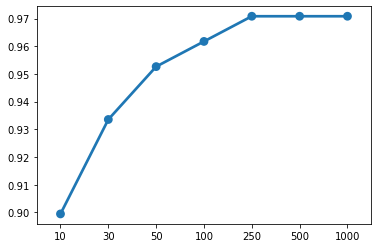

In [382]:
sns.pointplot(y=l,x=m)

In [77]:
l=[]
m=[]
for x,y in models.items():
    l.append(np.mean(evaluate_model_recall_positive(y, X_test1,Y_test1)))
    m.append(x)

<AxesSubplot:>

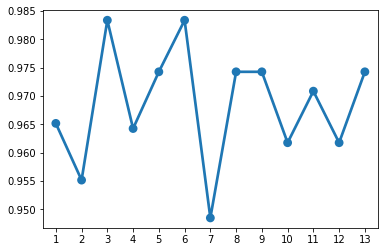

In [293]:
sns.pointplot(y=l,x=m)

**Learning Rate**

In [81]:
def get_models():
    models = dict()
    for i in [0.0001, 0.001, 0.01, 0.1,0.5,0.6,0.8,0.9, 1.0]:
        key = '%.4f' % i
        models[key] = GradientBoostingClassifier(learning_rate=i,random_state=42)
    return models

In [82]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>0.0001 0.388 (0.476)
>0.0010 0.925 (0.068)
>0.0100 0.899 (0.104)
>0.1000 0.962 (0.061)
>0.5000 0.971 (0.059)
>0.6000 0.971 (0.059)
>0.8000 0.983 (0.050)
>0.9000 0.974 (0.054)
>1.0000 0.974 (0.054)


In [83]:
l=[]
m=[]
for x,y in models.items():
    l.append(np.mean(evaluate_model_recall_positive(y, X_test1,Y_test1)))
    m.append(x)

<AxesSubplot:>

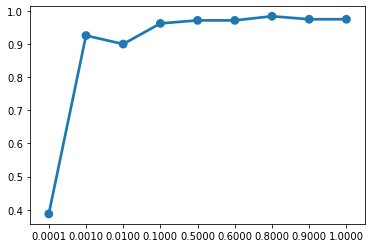

In [84]:
sns.pointplot(y=l,x=m)

**Tree Depth**

In [397]:
def get_models():
    models = dict()
    for i in range(1,20):
        models[str(i)] = GradientBoostingClassifier(max_depth=i,random_state=42)
    return models

In [398]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>1 0.946 (0.071)
>2 0.964 (0.058)
>3 0.962 (0.061)
>4 0.952 (0.062)
>5 0.926 (0.099)
>6 0.929 (0.062)
>7 0.929 (0.062)
>8 0.929 (0.062)
>9 0.929 (0.062)
>10 0.920 (0.058)
>11 0.929 (0.062)
>12 0.929 (0.062)
>13 0.929 (0.062)
>14 0.929 (0.062)
>15 0.929 (0.062)
>16 0.920 (0.058)
>17 0.920 (0.058)
>18 0.920 (0.058)
>19 0.920 (0.058)


In [399]:
l=[]
m=[]
for x,y in models.items():
    l.append(np.mean(evaluate_model_recall_positive(y, X_test1,Y_test1)))
    m.append(x)

<AxesSubplot:>

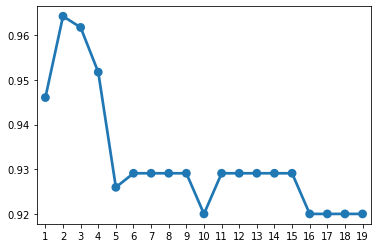

In [400]:
sns.pointplot(y=l,x=m)

**Number of Features**

In [167]:
def get_models():
    models = dict()
    for i in range(1,14):
        models[str(i)] = GradientBoostingClassifier(max_features=i,random_state=42)
    return models

In [168]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>1 0.965 (0.070)
>2 0.955 (0.058)
>3 0.983 (0.050)
>4 0.964 (0.058)
>5 0.974 (0.054)
>6 0.983 (0.050)
>7 0.948 (0.108)
>8 0.974 (0.054)
>9 0.974 (0.054)
>10 0.962 (0.061)
>11 0.971 (0.059)
>12 0.962 (0.061)
>13 0.974 (0.054)


In [169]:
l=[]
m=[]
for x,y in models.items():
    l.append(np.mean(evaluate_model_recall_positive(y, X_test1,Y_test1)))
    m.append(x)

<AxesSubplot:>

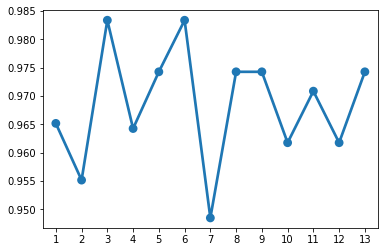

In [170]:
sns.pointplot(y=l,x=m)

**max_leaf_nodes**

In [393]:
def get_models():
    models = dict()
    for i in range(2,15):
        models[str(i)] = GradientBoostingClassifier(max_leaf_nodes=i,random_state=42)
    return models

In [394]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>2 0.946 (0.071)
>3 0.964 (0.058)
>4 0.964 (0.058)
>5 0.983 (0.050)
>6 0.948 (0.101)
>7 0.971 (0.059)
>8 0.962 (0.061)
>9 0.962 (0.061)
>10 0.962 (0.061)
>11 0.962 (0.061)
>12 0.962 (0.061)
>13 0.962 (0.061)
>14 0.962 (0.061)


In [395]:
l=[]
m=[]
for x,y in models.items():
    l.append(np.mean(evaluate_model_recall_positive(y, X_test1,Y_test1)))
    m.append(x)

<AxesSubplot:>

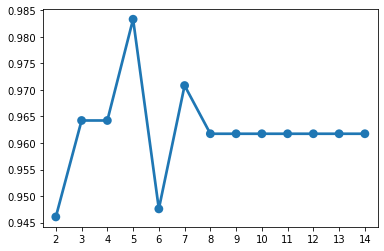

In [396]:
sns.pointplot(y=l,x=m)

# ExtraTreesClassifier

In [369]:
etc = ExtraTreesClassifier(n_estimators=100,max_features=6,random_state=42)
etc.fit(X_train1,Y_train1)

ExtraTreesClassifier(max_features=6, random_state=42)

In [370]:
print(classification_report(Y_test1,etc.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.96      1.00      0.98        96
 No diabetes       1.00      0.96      0.98        98

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [371]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(etc,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)))
print("precision is: ",np.mean(evaluate_model_precision(etc,X_test1,Y_test1)))

accuracy is:  0.9636842105263158
diabetes recall is:  0.956547619047619
no diabetes recall is:  0.9592185592185591
roc_auc is:  0.9928515928515929
precision is:  0.956547619047619


**Number of Trees**

In [372]:
def get_models():
    models = dict()
    n_trees = [10,30, 50, 100,250, 500, 1000]
    for n in n_trees:
        models[str(n)] = ExtraTreesClassifier(n_estimators=n,random_state=42)
    return models

In [373]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>10 0.947 (0.067)
>30 0.938 (0.065)
>50 0.957 (0.067)
>100 0.959 (0.064)
>250 0.957 (0.067)
>500 0.957 (0.067)
>1000 0.957 (0.067)


In [374]:
l=[]
m=[]
for x,y in models.items():
    l.append(np.mean(evaluate_model_recall_positive(y, X_test1,Y_test1)))
    m.append(x)

<AxesSubplot:>

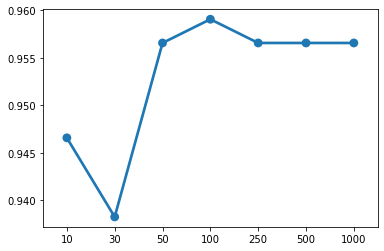

In [375]:
sns.pointplot(y=l,x=m)

**Number of Features**

In [376]:
def get_models():
    models = dict()
    for i in range(1,14):
        models[str(i)] = GradientBoostingClassifier(max_features=i,random_state=42)
    return models

In [377]:
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_recall_positive(model, X_test1,Y_test1)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>1 0.965 (0.070)
>2 0.955 (0.058)
>3 0.983 (0.050)
>4 0.964 (0.058)
>5 0.974 (0.054)
>6 0.983 (0.050)
>7 0.948 (0.108)
>8 0.974 (0.054)
>9 0.974 (0.054)
>10 0.962 (0.061)
>11 0.971 (0.059)
>12 0.962 (0.061)
>13 0.974 (0.054)


In [378]:
l=[]
m=[]
for x,y in models.items():
    l.append(np.mean(evaluate_model_recall_positive(y, X_test1,Y_test1)))
    m.append(x)

<AxesSubplot:>

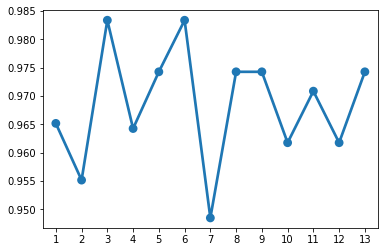

In [195]:
sns.pointplot(y=l,x=m)

# Ensemble of Adaboost,Gboost,Etc

In [237]:
model2=VotingClassifier(estimators=[ ('Adaboost', Adaboost),('Gboost',Gboost),('etc',etc)], voting='soft')
model2.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('Adaboost',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=250,
                                                 random_state=42)),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.8,
                                                         max_depth=2,
                                                         max_features=6,
                                                         n_estimators=250,
                                                         random_state=42)),
                             ('etc',
                              ExtraTreesClassifier(max_features=6,
                                                   random_state=42))],
                 voting='soft')

# Ensemble of Adaboost,Gboost,knn

In [238]:
model3=VotingClassifier(estimators=[ ('knn', Adaboost),('LR',knn),('rf',Gboost)], voting='soft')
model3.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('knn',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=250,
                                                 random_state=42)),
                             ('LR', KNeighborsClassifier(n_neighbors=11)),
                             ('rf',
                              GradientBoostingClassifier(learning_rate=0.8,
                                                         max_depth=2,
                                                         max_features=6,
                                                         n_estimators=250,
                                                         random_state=42))],
                 voting='soft')

# Ensemble of Adaboost,Gboost,rf

In [239]:
model4=VotingClassifier(estimators=[ ('Adaboost', Adaboost),('Gboost',Gboost),('rf',rf)], voting='soft')
model4.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('Adaboost',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=250,
                                                 random_state=42)),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.8,
                                                         max_depth=2,
                                                         max_features=6,
                                                         n_estimators=250,
                                                         random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=250,
                                                     oob_score=True,
                                                     random_state=42))],
                 voting='soft')

# Ensemble of Adaboost,Gboost

In [240]:
model5=VotingClassifier(estimators=[ ('Adaboost', Adaboost),('Gboost',Gboost)], voting='soft')
model5.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('Adaboost',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=250,
                                                 random_state=42)),
                             ('Gboost',
                              GradientBoostingClassifier(learning_rate=0.8,
                                                         max_depth=2,
                                                         max_features=6,
                                                         n_estimators=250,
                                                         random_state=42))],
                 voting='soft')

# Ensemble of classifier1,knn,svm

In [241]:
model6=VotingClassifier(estimators=[ ('dt', classifier1),('knn',knn),('svm',svm),('LR',LR)], voting='soft')
model6.fit(X_train1,Y_train1)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('LR',
                              LogisticRegression(C=0.03359818286283781,
                                                 random_state=42,
                                                 solver='liblinear'))],
                 voting='soft')

# Confusion Matrix

In [242]:
def conf_matrix(y_true,x_true,model):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_true, model.predict(x_true)), annot=True)
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Diabetes', 'No Diabetes']); ax.yaxis.set_ticklabels(['Diabetes', 'No Diabetes']);
    return ax

# testing scores

In [351]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(nb,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(nb,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(nb,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(nb,X_test1,Y_test1)))
print("precision is: ",np.mean(evaluate_model_precision(nb,X_test1,Y_test1)))

accuracy is:  0.8760526315789473
diabetes recall is:  0.8473701298701298
no diabetes recall is:  0.8947802197802197
roc_auc is:  0.9374470529470529
precision is:  0.8473701298701298


In [244]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(Gboost,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)))
print("precision is: ",np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)))

accuracy is:  0.9481578947368421
diabetes recall is:  0.9742424242424242
no diabetes recall is:  0.9052503052503053
roc_auc is:  0.9837606837606838
precision is:  0.9742424242424242


In [245]:
print("accuracy is: ",np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)))
print("diabetes recall is: ",np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)))
print("no diabetes recall is: ",np.mean(evaluate_model_recall_negative(etc,X_test1,Y_test1)))
print("roc_auc is: ",np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)))
print("precision is: ",np.mean(evaluate_model_precision(etc,X_test1,Y_test1)))

accuracy is:  0.9636842105263158
diabetes recall is:  0.956547619047619
no diabetes recall is:  0.9592185592185591
roc_auc is:  0.9928515928515929
precision is:  0.956547619047619


# showing Confuction Matrix

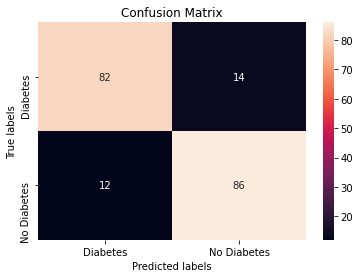

In [357]:
conf_matrix(Y_test1,X_test1,nb)
plt.show()

In [247]:
Y_test1.value_counts()

No diabetes    98
Diabetes       96
Name: Diabetes, dtype: int64

In [248]:
pd.DataFrame(etc.predict(X_test1)).value_counts()

Diabetes       100
No diabetes     94
dtype: int64

# plotting roc-auc curve

In [249]:
import sklearn.metrics as metrics
def roc_auc_curve(model,x,y):
    probs = model.predict_proba(x)
    preds = probs[:,0]
    fpr, tpr, threshold = metrics.roc_curve(y, preds,pos_label="Diabetes")
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC =%0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()



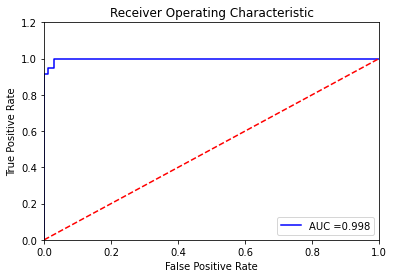

In [250]:
roc_auc_curve(svm,X_test1,Y_test1)

# All Scores

In [251]:
scores_df=pd.DataFrame()

LR_scores={'accuracy': [0.8868421052631579],
 'recall_positive': [0.9058658008658009],

 'roc_auc': [0.9233404928404928],
 'precision': [0.9058658008658009],
 "f1_score":[0.9058658008658009]}

scores_df=pd.DataFrame(LR_scores,index=["LR"])

scores_df.loc["knn"] = [np.mean(evaluate_model_accuracy(knn,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(knn,X_test1,Y_test1)),
               
                       np.mean(evaluate_model_roc_auc(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(knn,X_test1,Y_test1))]


scores_df.loc["classifier1"] = [np.mean(evaluate_model_accuracy(classifier1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(classifier1,X_test1,Y_test1)),
                 
                       np.mean(evaluate_model_roc_auc(classifier1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(classifier1,X_test1,Y_test1)),
                               np.mean(evaluate_model_f1score(classifier1,X_test1,Y_test1))]

scores_df.loc["svm"] = [np.mean(evaluate_model_accuracy(svm,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(svm,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(svm,X_test1,Y_test1))]

scores_df.loc["nb"] = [np.mean(evaluate_model_accuracy(nb,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(nb,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(nb,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(nb,X_test1,Y_test1)),
                      np.mean(evaluate_model_f1score(nb,X_test1,Y_test1))]

scores_df.loc["rf"] = [np.mean(evaluate_model_accuracy(rf,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(rf,X_test1,Y_test1)),
                
                       np.mean(evaluate_model_roc_auc(rf,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(rf,X_test1,Y_test1)),
                      np.mean(evaluate_model_f1score(rf,X_test1,Y_test1))]

scores_df.loc["Gboost"] = [np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)),
                          np.mean(evaluate_model_f1score(Gboost,X_test1,Y_test1))]

scores_df.loc["Adaboost"] = [np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Adaboost,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(Adaboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Adaboost,X_test1,Y_test1)),
                            np.mean(evaluate_model_f1score(Adaboost,X_test1,Y_test1))]

scores_df.loc["etc"] = [np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)),
                     
                       np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(etc,X_test1,Y_test1))]

scores_df.loc["model1"] = [np.mean(evaluate_model_accuracy(model1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model1,X_test1,Y_test1)),
                     
                       np.mean(evaluate_model_roc_auc(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model1,X_test1,Y_test1))]

scores_df.loc["model2"] = [np.mean(evaluate_model_accuracy(model2,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model2,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model2,X_test1,Y_test1))]

scores_df.loc["model3"]=[np.mean(evaluate_model_accuracy(model3,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model3,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model3,X_test1,Y_test1))]

scores_df.loc["model4"]=[np.mean(evaluate_model_accuracy(model4,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model4,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model4,X_test1,Y_test1))]

scores_df.loc["model5"]=[np.mean(evaluate_model_accuracy(model5,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model5,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model5,X_test1,Y_test1))]


scores_df.loc["model6"]=[np.mean(evaluate_model_accuracy(model6,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model6,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model6,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model6,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model6,X_test1,Y_test1))]

In [252]:
scores_df["total_scores"] = scores_df.sum(axis=1)

In [346]:
scores_df.sort_values(by="f1_score",ascending=False)

,accuracy,recall_positive,roc_auc,precision,f1_score,total_scores
Adaboost,0.953421,0.990000,0.975990,0.990000,0.990000,4.899411
model2,0.963421,0.983333,0.992852,0.983333,0.983333,4.906273
model3,0.963421,0.983333,0.985251,0.983333,0.983333,4.898672
Gboost,0.948158,0.974242,0.983761,0.974242,0.974242,4.854646
model4,0.958421,0.974242,0.991841,0.974242,0.974242,4.872990
model5,0.948158,0.974242,0.977078,0.974242,0.974242,4.847964
knn,0.870789,0.964242,0.948360,0.964242,0.964242,4.711877
rf,0.968947,0.960833,0.991841,0.960833,0.960833,4.843289
etc,0.963684,0.956548,0.992852,0.956548,0.956548,4.826179
model6,0.912368,0.942652,0.976748,0.942652,0.942652,4.717071


# Individual model scores

In [254]:
individual_scores=pd.DataFrame()

LR_scores={'accuracy': [0.8868421052631579],
 'recall_positive': [0.9058658008658009],

 'roc_auc': [0.9233404928404928],
 'precision': [0.9058658008658009],
 "f1_score":[0.9058658008658009]}

individual_scores=pd.DataFrame(LR_scores,index=["LR"])

individual_scores.loc["knn"] = [np.mean(evaluate_model_accuracy(knn,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(knn,X_test1,Y_test1)),
               
                       np.mean(evaluate_model_roc_auc(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(knn,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(knn,X_test1,Y_test1))]


individual_scores.loc["classifier1"] = [np.mean(evaluate_model_accuracy(classifier1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(classifier1,X_test1,Y_test1)),
                 
                       np.mean(evaluate_model_roc_auc(classifier1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(classifier1,X_test1,Y_test1)),
                               np.mean(evaluate_model_f1score(classifier1,X_test1,Y_test1))]

individual_scores.loc["svm"] = [np.mean(evaluate_model_accuracy(svm,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(svm,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(svm,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(svm,X_test1,Y_test1))]

individual_scores.loc["nb"] = [np.mean(evaluate_model_accuracy(nb,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(nb,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(nb,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(nb,X_test1,Y_test1)),
                      np.mean(evaluate_model_f1score(nb,X_test1,Y_test1))]

In [316]:
individual_scores.sort_values(by="recall_positive",ascending=False)

,accuracy,recall_positive,roc_auc,precision,f1_score
knn,0.870789,0.964242,0.948360,0.964242,0.964242
svm,0.922632,0.918366,0.976922,0.918366,0.918366
LR,0.886842,0.905866,0.923340,0.905866,0.905866
classifier1,0.876842,0.881894,0.870843,0.881894,0.881894
nb,0.876053,0.847370,0.937447,0.847370,0.847370


# Ensemble Models Scores

In [256]:
Ensemble_scores=pd.DataFrame()

rf_scores={'accuracy': [0.9689473684210526],
 'recall_positive': [0.9517424242424243],

 'roc_auc': [0.9931235431235432],
 'precision': [0.9608333333333334],
 "f1_score":[0.9608333333333334]}

Ensemble_scores=pd.DataFrame(rf_scores,index=["rf"])


Ensemble_scores.loc["Gboost"] = [np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Gboost,X_test1,Y_test1)),
              
                       np.mean(evaluate_model_roc_auc(Gboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Gboost,X_test1,Y_test1)),
                          np.mean(evaluate_model_f1score(Gboost,X_test1,Y_test1))]

Ensemble_scores.loc["Adaboost"] = [np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(Adaboost,X_test1,Y_test1)),
                  
                       np.mean(evaluate_model_roc_auc(Adaboost,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(Adaboost,X_test1,Y_test1)),
                            np.mean(evaluate_model_f1score(Adaboost,X_test1,Y_test1))]

Ensemble_scores.loc["etc"] = [np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(etc,X_test1,Y_test1)),
                     
                       np.mean(evaluate_model_roc_auc(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(etc,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(etc,X_test1,Y_test1))]

In [317]:
Ensemble_scores.sort_values(by="recall_positive",ascending=False)

,accuracy,recall_positive,roc_auc,precision,f1_score
Adaboost,0.953421,0.990000,0.975990,0.990000,0.990000
Gboost,0.948158,0.974242,0.983761,0.974242,0.974242
etc,0.963684,0.956548,0.992852,0.956548,0.956548
rf,0.968947,0.951742,0.993124,0.960833,0.960833


# Custom Ensemble Models

In [258]:
custom_custom_ensemble_scores=pd.DataFrame()

model1_scores={'accuracy': [0.9021052631578949],
 'recall_positive': [ 0.9058658008658009],

 'roc_auc': [0.9726289266289267],
 'precision': [0.9058658008658009],
 "f1_score":[ 0.9058658008658009]}

custom_ensemble_scores=pd.DataFrame(model1_scores,index=["model1"])


custom_ensemble_scores.loc["model2"] = [np.mean(evaluate_model_accuracy(model2,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model2,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model2,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model2,X_test1,Y_test1))]

custom_ensemble_scores.loc["model3"]=[np.mean(evaluate_model_accuracy(model3,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model3,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model3,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model3,X_test1,Y_test1))]

custom_ensemble_scores.loc["model4"]=[np.mean(evaluate_model_accuracy(model4,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model4,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model4,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model4,X_test1,Y_test1))]

custom_ensemble_scores.loc["model5"]=[np.mean(evaluate_model_accuracy(model5,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model5,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model5,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model5,X_test1,Y_test1))]


custom_ensemble_scores.loc["model6"]=[np.mean(evaluate_model_accuracy(model6,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model6,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model6,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model6,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model6,X_test1,Y_test1))]

custom_ensemble_scores.loc["model1"] = [np.mean(evaluate_model_accuracy(model1,X_test1,Y_test1)),
                        np.mean(evaluate_model_recall_positive(model1,X_test1,Y_test1)),
                    
                       np.mean(evaluate_model_roc_auc(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_precision(model1,X_test1,Y_test1)),
                       np.mean(evaluate_model_f1score(model1,X_test1,Y_test1))]


In [339]:
custom_ensemble_scores.sort_values(by="recall_positive",ascending=False)

,accuracy,recall_positive,roc_auc,precision,f1_score
model2,0.963421,0.983333,0.992852,0.983333,0.983333
model3,0.963421,0.983333,0.985251,0.983333,0.983333
model4,0.958421,0.974242,0.991841,0.974242,0.974242
model5,0.948158,0.974242,0.977078,0.974242,0.974242
model6,0.912368,0.942652,0.976748,0.942652,0.942652
model1,0.907368,0.905866,0.976659,0.905866,0.905866


In [336]:
Ensemble_scores.sort_values(by="accuracy",ascending=False)

,accuracy,recall_positive,roc_auc,precision,f1_score
rf,0.968947,0.951742,0.993124,0.960833,0.960833
etc,0.963684,0.956548,0.992852,0.956548,0.956548
Adaboost,0.953421,0.990000,0.975990,0.990000,0.990000
Gboost,0.948158,0.974242,0.983761,0.974242,0.974242


In [335]:
individual_scores.sort_values(by="accuracy",ascending=False)

,accuracy,recall_positive,roc_auc,precision,f1_score
svm,0.922632,0.918366,0.976922,0.918366,0.918366
LR,0.886842,0.905866,0.923340,0.905866,0.905866
classifier1,0.876842,0.881894,0.870843,0.881894,0.881894
nb,0.876053,0.847370,0.937447,0.847370,0.847370
knn,0.870789,0.964242,0.948360,0.964242,0.964242


In [262]:
df

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,No diabetes
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,No diabetes
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,No diabetes
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,No diabetes
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,271,121,40,6.8,81,0,64,158,27.1,146,76,36,43,0.84,No diabetes
383,240,88,49,4.9,82,0,63,170,30.1,180,86,41,46,0.89,No diabetes
384,255,112,34,7.5,82,1,66,163,26.3,179,89,37,43,0.86,No diabetes
385,227,105,44,5.2,83,0,59,125,25.2,150,90,35,40,0.88,No diabetes


In [263]:
# metrics=["rf","etc","Gboost","Adaboost"]
# plot_accuracies=[np.mean(evaluate_model_accuracy(rf,X_test1,Y_test1)),
#                          np.mean(evaluate_model_accuracy(etc,X_test1,Y_test1)),
#                                  np.mean(evaluate_model_accuracy(Gboost,X_test1,Y_test1)),
#                                          np.mean(evaluate_model_accuracy(Adaboost,X_test1,Y_test1))]
# plt.figure(figsize=(8,4))
# plt.yticks(np.arange(0, 1, step=0.001))
# sns.pointplot(y=plot_accuracies,x=metrics,linestyles="--")
# plt.show()

# perfomance comparision through graphs

In [264]:
def ensemble_graph(x):
    metrics=["rf","etc","Gboost","Adaboost"]
    plot_accuracies=[np.mean(x(rf,X_test1,Y_test1)),
                         np.mean(x(etc,X_test1,Y_test1)),
                                 np.mean(x(Gboost,X_test1,Y_test1)),
                                         np.mean(x(Adaboost,X_test1,Y_test1))]
    plt.figure(figsize=(10,4))
#     plt.yticks(np.arange(0, 1, step=0.002))
    sns.pointplot(y=plot_accuracies,x=metrics,markers='*',linestyles="--")
    return plt.show()

In [265]:
def individual_graph(x):
    metrics=["LR","knn","classifier1","svm","nb"]
    plot_accuracies=[np.mean(x(LR,X_test1,Y_test1)),
                         np.mean(x(knn,X_test1,Y_test1)),
                                 np.mean(x(classifier1,X_test1,Y_test1)),
                                         np.mean(x(svm,X_test1,Y_test1)),
                                              np.mean(x(nb,X_test1,Y_test1))]
    plt.figure(figsize=(10,4))
#     plt.yticks(np.arange(0, 1, step=0.002))
    sns.pointplot(y=plot_accuracies,x=metrics,markers='*',linestyles="--")
    return plt.show()

In [266]:
def custom_graph(x):
    metrics=["model1","model2","model3","model4","model5","model6"]
    plot_accuracies=[np.mean(x(model1,X_test1,Y_test1)),
                         np.mean(x(model2,X_test1,Y_test1)),
                                 np.mean(x(model3,X_test1,Y_test1)),
                                         np.mean(x(model4,X_test1,Y_test1)),
                                              np.mean(x(model5,X_test1,Y_test1)),
                                                   np.mean(x(model6,X_test1,Y_test1))]
    plt.figure(figsize=(10,4))
    sns.pointplot(y=plot_accuracies,x=metrics,markers='*',linestyles="--")
    return plt.show()

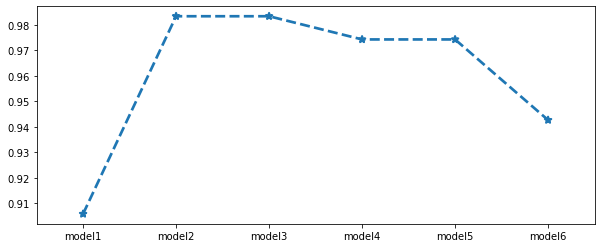

In [318]:
custom_graph(evaluate_model_recall_positive)

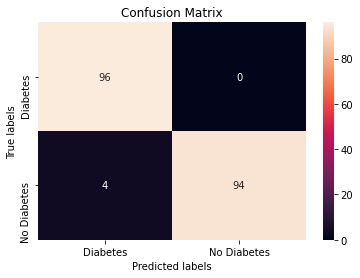

In [268]:
conf_matrix(Y_test1,X_test1,rf)
plt.show()

In [269]:
print(classification_report(Y_test1,rf.predict(X_test1)))

              precision    recall  f1-score   support

    Diabetes       0.96      1.00      0.98        96
 No diabetes       1.00      0.96      0.98        98

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [270]:
list(scores_df.index)

['LR',
 'knn',
 'classifier1',
 'svm',
 'nb',
 'rf',
 'Gboost',
 'Adaboost',
 'etc',
 'model1',
 'model2',
 'model3',
 'model4',
 'model5',
 'model6']

In [271]:
def all_model_graph(x):
    metrics=list(scores_df.index)
    plot_accuracies=[np.mean(x(LR,X_test1,Y_test1)),
                         np.mean(x(knn,X_test1,Y_test1)),
                                 np.mean(x(classifier1,X_test1,Y_test1)),
                                         np.mean(x(svm,X_test1,Y_test1)),
                                              np.mean(x(nb,X_test1,Y_test1)),
                                                   np.mean(x(rf,X_test1,Y_test1)),
                     np.mean(x(Gboost,X_test1,Y_test1)),
                         np.mean(x(Adaboost,X_test1,Y_test1)),
                                 np.mean(x(etc,X_test1,Y_test1)),
                    np.mean(x(model1,X_test1,Y_test1)),
                         np.mean(x(model2,X_test1,Y_test1)),
                                 np.mean(x(model3,X_test1,Y_test1)),
                                         np.mean(x(model4,X_test1,Y_test1)),
                                              np.mean(x(model5,X_test1,Y_test1)),
                                                   np.mean(x(model6,X_test1,Y_test1))]
    plt.figure(figsize=(15,4))
    sns.pointplot(y=plot_accuracies,x=metrics,markers='*',linestyles="--")
    return plt.show()

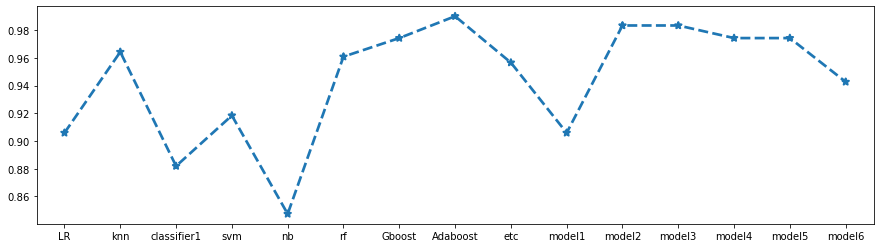

In [320]:
all_model_graph(evaluate_model_recall_positive)

In [273]:
Y_test1.value_counts()

No diabetes    98
Diabetes       96
Name: Diabetes, dtype: int64

In [274]:
pd.DataFrame(Adaboost.predict(X_test1)).value_counts()

Diabetes       101
No diabetes     93
dtype: int64

In [275]:
# metrics=["model1","model2","model3","model4","model5","model6"]
# plot_accuracies=[np.mean(evaluate_model_accuracy(model1,X_test1,Y_test1)),
#                          np.mean(evaluate_model_accuracy(model2,X_test1,Y_test1)),
#                                  np.mean(evaluate_model_accuracy(model3,X_test1,Y_test1)),
#                                          np.mean(evaluate_model_accuracy(model4,X_test1,Y_test1)),
#                                               np.mean(evaluate_model_accuracy(model5,X_test1,Y_test1)),
#                                                    np.mean(evaluate_model_accuracy(model6,X_test1,Y_test1))]
# plot_recall=[np.mean(evaluate_model_recall_positive(model1,X_test1,Y_test1)),
#                          np.mean(evaluate_model_recall_positive(model2,X_test1,Y_test1)),
#                                  np.mean(evaluate_model_recall_positive(model3,X_test1,Y_test1)),
#                                          np.mean(evaluate_model_recall_positive(model4,X_test1,Y_test1)),
#                                               np.mean(evaluate_model_recall_positive(model5,X_test1,Y_test1)),
#                                                    np.mean(evaluate_model_recall_positive(model6,X_test1,Y_test1))]

# plot_precision=[np.mean(evaluate_model_precision(model1,X_test1,Y_test1)),
#                          np.mean(evaluate_model_precision(model2,X_test1,Y_test1)),
#                                  np.mean(evaluate_model_precision(model3,X_test1,Y_test1)),
#                                          np.mean(evaluate_model_precision(model4,X_test1,Y_test1)),
#                                               np.mean(evaluate_model_precision(model5,X_test1,Y_test1)),
#                                                    np.mean(evaluate_model_precision(model6,X_test1,Y_test1))]

# plot_roc_auc=[np.mean(evaluate_model_roc_auc(model1,X_test1,Y_test1)),
#                          np.mean(evaluate_model_roc_auc(model2,X_test1,Y_test1)),
#                                  np.mean(evaluate_model_roc_auc(model3,X_test1,Y_test1)),
#                                          np.mean(evaluate_model_roc_auc(model4,X_test1,Y_test1)),
#                                               np.mean(evaluate_model_roc_auc(model5,X_test1,Y_test1)),
#                                                    np.mean(evaluate_model_roc_auc(model6,X_test1,Y_test1))]

# plot_f1=[np.mean(evaluate_model_f1score(model1,X_test1,Y_test1)),
#                          np.mean(evaluate_model_f1score(model2,X_test1,Y_test1)),
#                                  np.mean(evaluate_model_f1score(model3,X_test1,Y_test1)),
#                                          np.mean(evaluate_model_f1score(model4,X_test1,Y_test1)),
#                                               np.mean(evaluate_model_f1score(model5,X_test1,Y_test1)),
#                                                    np.mean(evaluate_model_f1score(model6,X_test1,Y_test1))]

# plt.figure(figsize=(10,4))
# sns.pointplot(y=plot_accuracies,x=metrics,markers='*',linestyles=':',color="red")
# sns.pointplot(y=plot_f1,x=metrics,markers='*',linestyles=':',color="green")
# sns.pointplot(y=plot_precision,x=metrics,markers='*',linestyles=':',color="yellow")
# sns.pointplot(y=plot_roc_auc,x=metrics,markers='*',linestyles=':',color="blue")
# sns.pointplot(y=plot_recall,x=metrics,markers='*',linestyles=':',color="k")

In [276]:
AdaBoostClassifier(random_state=42,n_estimators=250,learning_rate=1,base_estimator="sdfas")

AdaBoostClassifier(base_estimator='sdfas', learning_rate=1, n_estimators=250,
                   random_state=42)

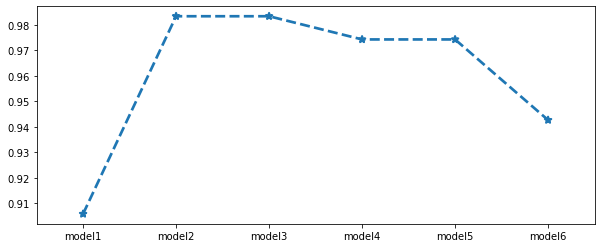

In [277]:
custom_graph(evaluate_model_recall_positive)

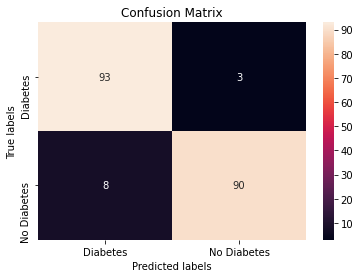

In [278]:
conf_matrix(Y_test1,X_test1,AdaBoostClassifier().fit(X_train1,Y_train1))
plt.show()

In [279]:
df.describe(include=['float', 'int'])

,Chol/HDL ratio,Gender,BMI,Waist/hip ratio
count,290.000000,290.000000,290.000000,290.000000
mean,4.273103,0.403448,27.807241,0.872414
std,1.319891,0.491437,5.784885,0.067897
min,2.200000,0.000000,15.200000,0.680000
25%,3.200000,0.000000,23.400000,0.830000
50%,4.050000,0.000000,27.400000,0.870000
75%,5.200000,1.000000,31.000000,0.910000
max,8.700000,1.000000,43.900000,1.080000


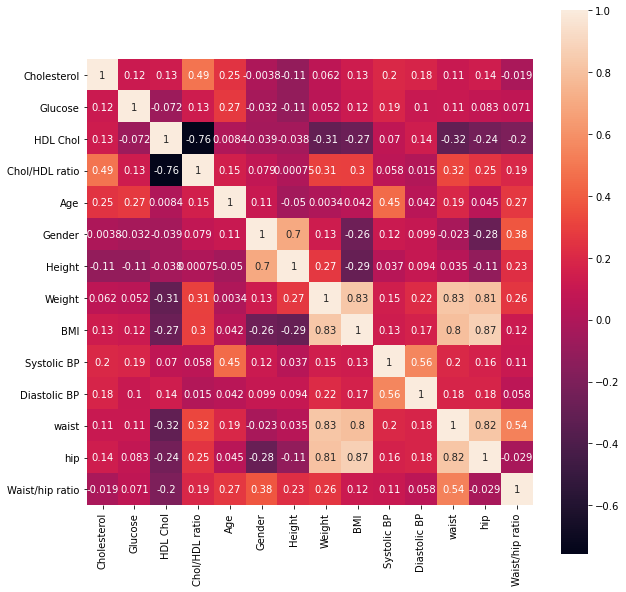

In [128]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

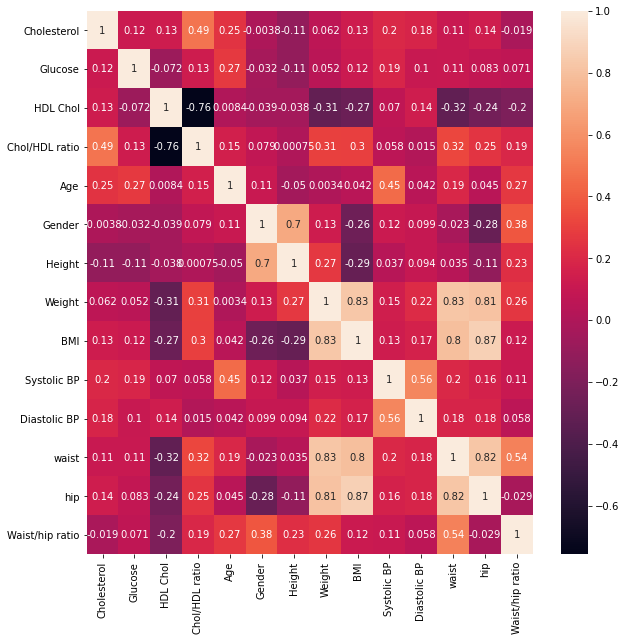

In [129]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()

In [42]:
from sklearn.cluster import KMeans

In [58]:
kmeans = KMeans(n_clusters=2, random_state= 42).fit(X_res)

In [59]:
y_predict= kmeans.predict(X_res)  

In [60]:
pd.DataFrame(y_predict).value_counts()

1    286
0    268
dtype: int64

In [61]:
y_res.value_counts()

Diabetes       277
No diabetes    277
Name: Diabetes, dtype: int64

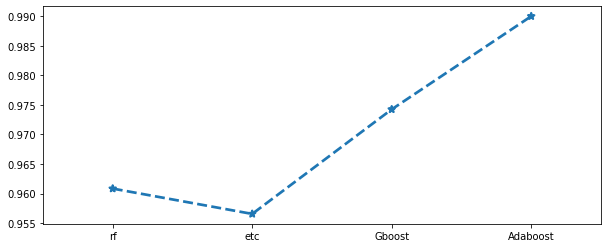

In [322]:
ensemble_graph(evaluate_model_recall_positive)